In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

layoffs_df= pd.read_excel("Data/layoffs.xlsx")

In [3]:
layoffs_df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,N26,Berlin,Finance,71.0,0.04,2023-04-28,Series E,United States,1700.0
1,Providoor,Melbourne,Food,NaN,1.00,2023-04-28,Unknown,Australia,NaN
2,Dropbox,SF Bay Area,Other,500.0,0.16,2023-04-27,Post-IPO,United States,1700.0
3,Vroom,New York City,Transportation,120.0,0.11,2023-04-27,Post-IPO,United States,1300.0
4,Greenhouse,New York City,Recruiting,100.0,0.12,2023-04-27,Private Equity,United States,110.0


In [4]:
layoffs_df.columns

Index(['company', 'location', 'industry', 'total_laid_off',
       'percentage_laid_off', 'date', 'stage', 'country', 'funds_raised'],
      dtype='object')

In [5]:
layoffs_df.dtypes

company                 object
location                object
industry                object
total_laid_off         float64
percentage_laid_off    float64
date                    object
stage                   object
country                 object
funds_raised           float64
dtype: object

In [6]:
layoffs_df.describe()

,total_laid_off,percentage_laid_off,funds_raised
count,1746.000000,1694.000000,2297.000000
mean,256.022337,0.260577,814.143794
std,841.557354,0.258415,5448.104463
min,3.000000,0.000000,0.000000
25%,38.000000,0.100000,50.000000
50%,80.000000,0.170000,156.000000
75%,180.000000,0.300000,442.000000
max,12000.000000,1.000000,121900.000000


# Handling Missing Values

In [7]:
average_funds_raised = layoffs_df['funds_raised'].mean()
layoffs_df['funds_raised'].fillna(value=average_funds_raised, inplace=True)

In [8]:
average_laid_off = layoffs_df['total_laid_off'].mean()
layoffs_df['total_laid_off'].fillna(value=average_laid_off, inplace=True)

# Check Count of Categorical Values in Data

In [9]:
layoffs_df['stage'].value_counts()

Post-IPO          478
Unknown           418
Series B          326
Series C          320
Series D          234
Acquired          195
Series A          192
Series E          133
Seed               71
Series F           69
Private Equity     42
Series H           26
Series G           15
Series J            8
Series I            7
Subsidiary          5
Name: stage, dtype: int64

In [10]:
layoffs_df['industry'].value_counts()

Finance           315
Retail            215
Healthcare        196
Transportation    158
Food              153
Marketing         145
Other             141
Consumer          128
Real Estate       123
Crypto            106
Media             103
Education         103
Data               88
Security           78
HR                 77
Travel             69
Infrastructure     46
Support            44
Logistics          42
Sales              38
Product            35
Fitness            33
Recruiting         30
Hardware           26
Construction       16
Legal              13
Energy             12
Aerospace           6
Manufacturing       4
Name: industry, dtype: int64

In [11]:
layoffs_df['country'].value_counts()

United States     1649
India              169
Canada             108
United Kingdom      80
Brazil              76
                  ... 
Italy                1
Hungary              1
Ukraine              1
Philippines          1
Myanmar              1
Name: country, Length: 62, dtype: int64

# Identify Correlations

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# convert the categorical columns to numerical
layoffs_df['industry_encoded'] = le.fit_transform(layoffs_df['industry'])
layoffs_df['stage_encoded'] = le.fit_transform(layoffs_df['stage'])

In [13]:
print("Correlation between industry and total_laid_off:", layoffs_df['industry_encoded'].corr(layoffs_df['total_laid_off']))
print("Correlation between stage and total_laid_off:", layoffs_df['stage_encoded'].corr(layoffs_df['total_laid_off']))

Correlation between industry and total_laid_off: 0.0013223511206373784
Correlation between stage and total_laid_off: -0.11103656782972111


In [14]:
layoffs_df.corr()

C:\Users\abdal\AppData\Local\Temp\ipykernel_19352\3887104223.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  layoffs_df.corr()


,total_laid_off,percentage_laid_off,funds_raised,industry_encoded,stage_encoded
total_laid_off,1.000000,-0.042249,0.088483,0.001322,-0.111037
percentage_laid_off,-0.042249,1.000000,-0.060783,-0.039010,0.047779
funds_raised,0.088483,-0.060783,1.000000,0.031428,-0.049506
industry_encoded,0.001322,-0.039010,0.031428,1.000000,-0.078141
stage_encoded,-0.111037,0.047779,-0.049506,-0.078141,1.000000


C:\Users\abdal\AppData\Local\Temp\ipykernel_19352\1758009492.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_heatmap = layoffs_df.corr()


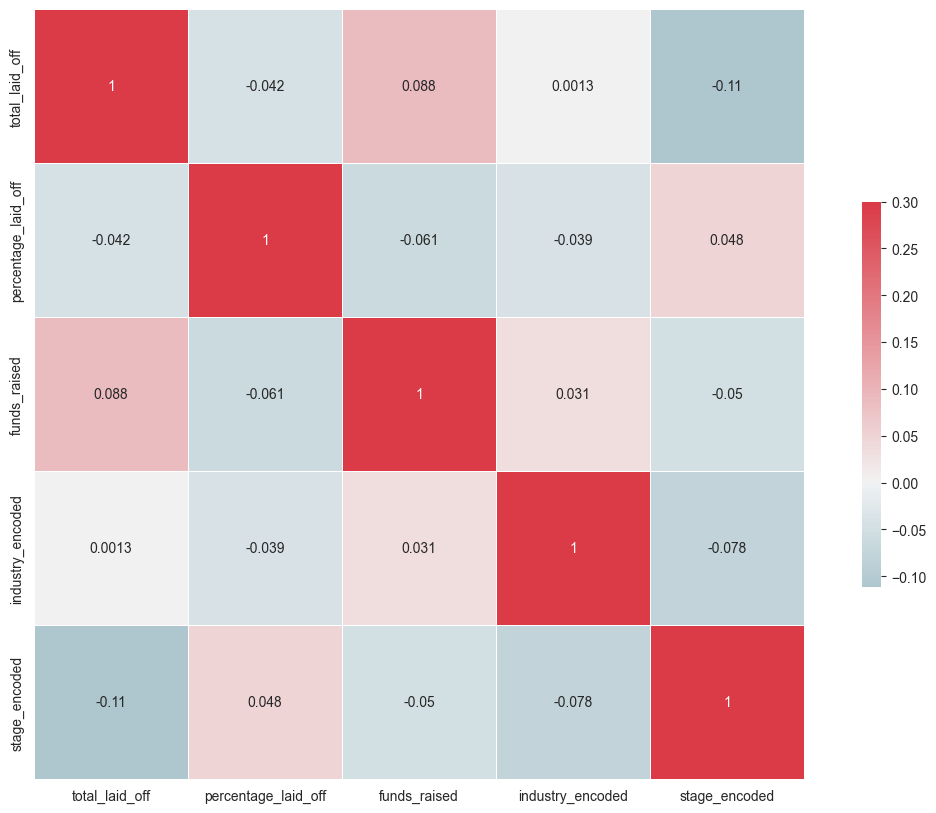

In [15]:
# A heatmap to better represent and understand the correlations
corr_heatmap = layoffs_df.corr()
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_heatmap, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Correlation: 0.088


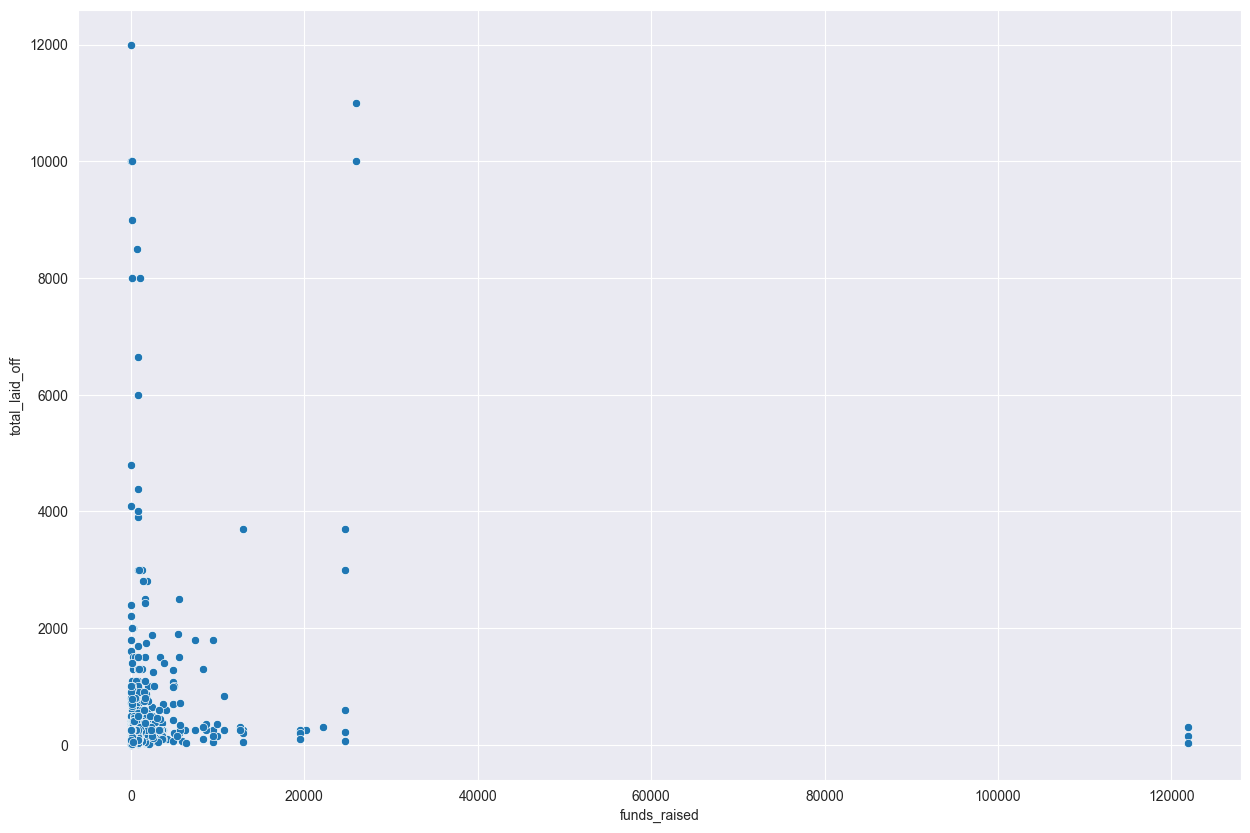

In [16]:
correlation = layoffs_df['funds_raised'].corr(layoffs_df['total_laid_off'])
print('Correlation: %.3f' % correlation)
plt.figure(figsize=(15, 10))
sns.scatterplot(data=layoffs_df, x="funds_raised", y="total_laid_off")
plt.show()

# Average Layoffs per Industry

Average layoffs per industry:
 industry
Hardware          1048.314565
Consumer           512.162532
Sales              374.739193
Other              373.199727
Fitness            347.218890
Retail             334.783705
Travel             326.601001
Construction       321.444480
Food               305.641287
Transportation     304.993138
Infrastructure     244.597154
Real Estate        242.658578
Healthcare         227.405481
Education          217.104027
Crypto             205.603401
Aerospace          195.507446
Energy             194.844502
Finance            172.009698
Logistics          169.006382
HR                 163.059490
Data               163.042467
Support            155.711145
Security           149.159287
Marketing          142.888920
Media              141.492810
Recruiting         139.003723
Legal              123.389770
Product            115.692734
Manufacturing      103.505584
Name: total_laid_off, dtype: float64


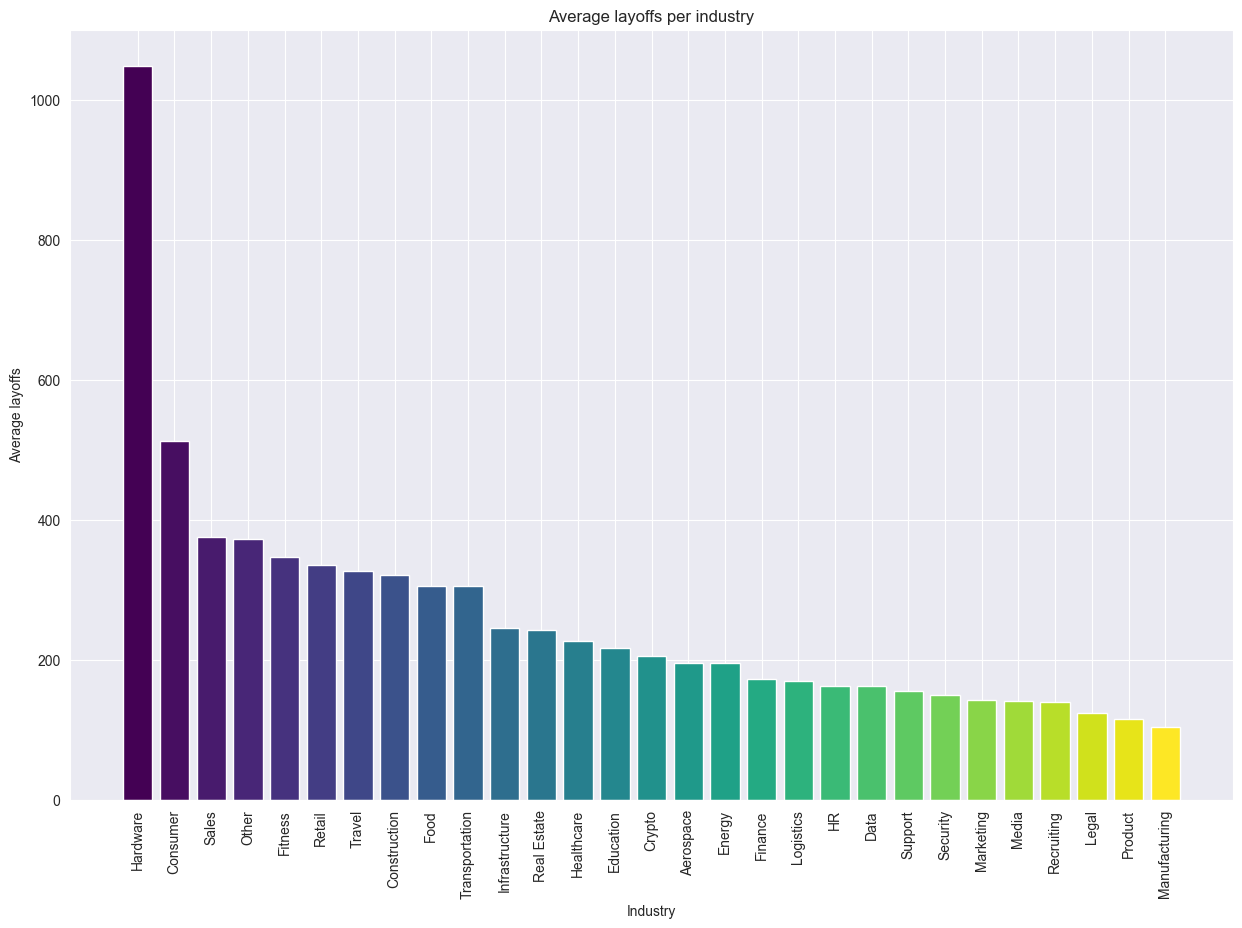

In [17]:
import matplotlib.cm as cm
# Calculating mean number of layoffs per industry
average_layoffs_per_industry = layoffs_df.groupby('industry')['total_laid_off'].mean().sort_values(ascending=False)
print("Average layoffs per industry:\n", average_layoffs_per_industry)

colors = cm.viridis(np.linspace(0, 1, len(average_layoffs_per_industry)))
plt.figure(figsize=(15,10))
plt.bar(average_layoffs_per_industry.index, average_layoffs_per_industry.values, color=colors)
plt.title('Average layoffs per industry')
plt.xlabel('Industry')
plt.ylabel('Average layoffs')
plt.xticks(rotation=90)
plt.show()

# Total layoffs per industry

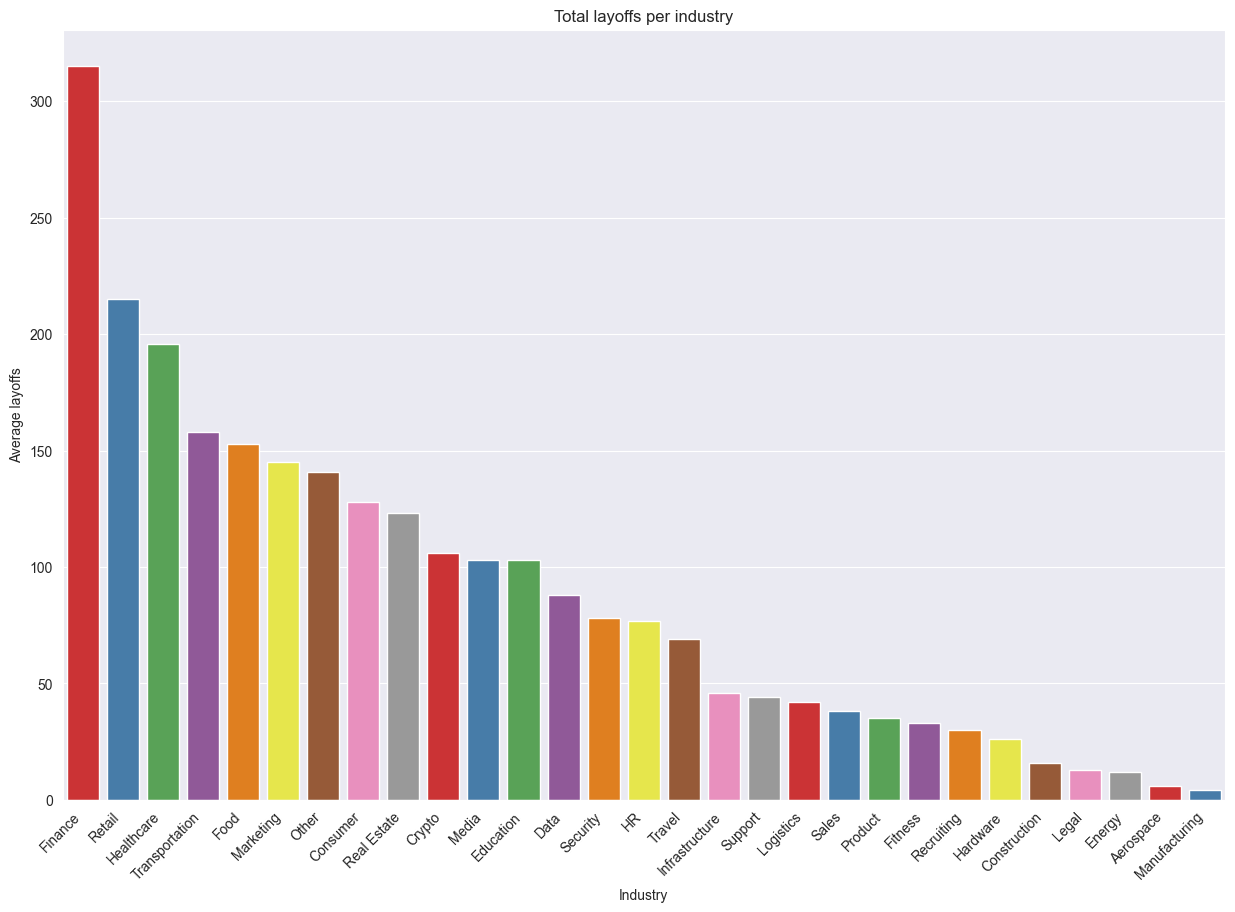

In [18]:
industry_counts = layoffs_df['industry'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(15,10))
chart = sns.barplot(
    x=industry_counts.index,
    y=industry_counts.values,
    palette='Set1'
)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Total layoffs per industry')
plt.xlabel('Industry')
plt.ylabel('Average layoffs')
plt.show()

# Lay-Offs Chronology

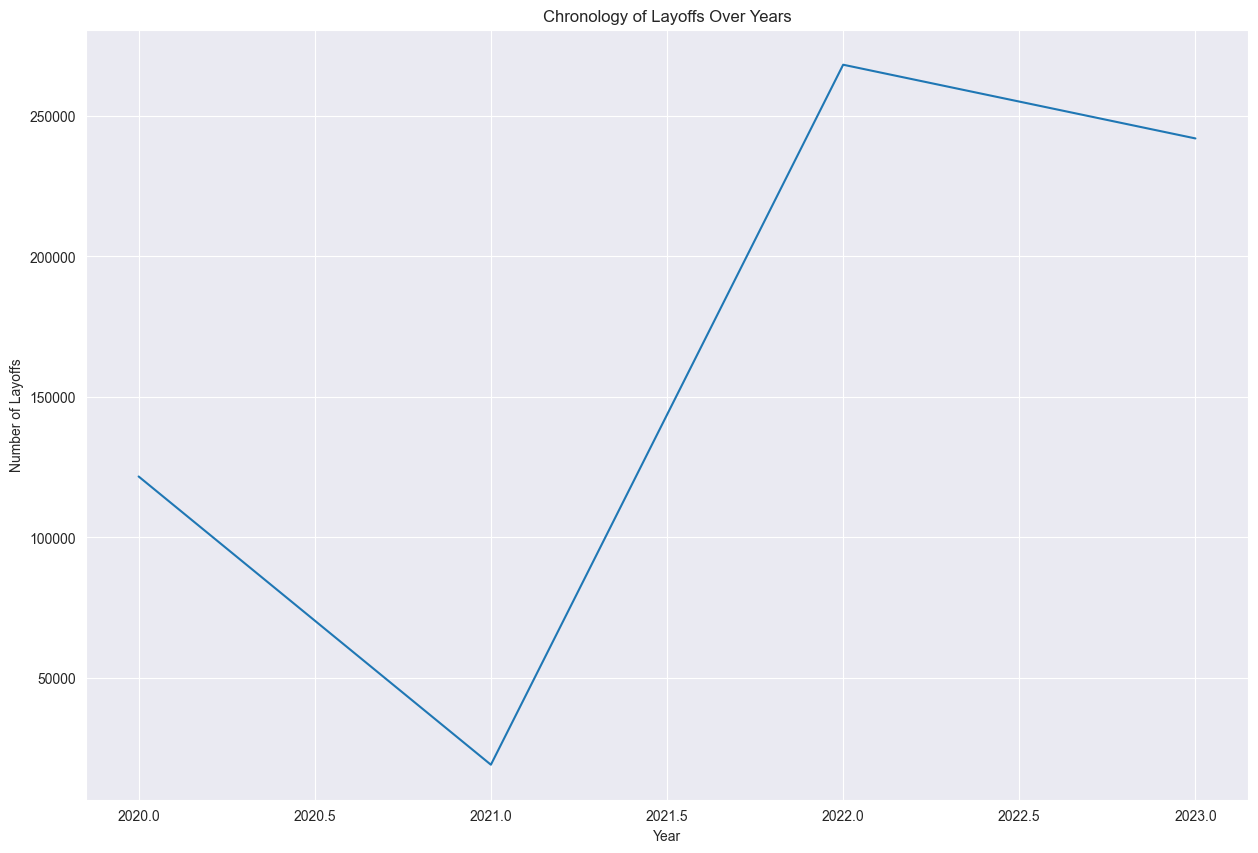

In [19]:
layoffs_df['date'] = pd.to_datetime(layoffs_df['date'])
yearly_layoffs = layoffs_df.resample('Y', on='date')['total_laid_off'].sum()

plt.figure(figsize=(15,10))
sns.lineplot(x=yearly_layoffs.index.year, y=yearly_layoffs.values)
plt.xlabel('Year')
plt.ylabel('Number of Layoffs')
plt.title('Chronology of Layoffs Over Years')
plt.show()

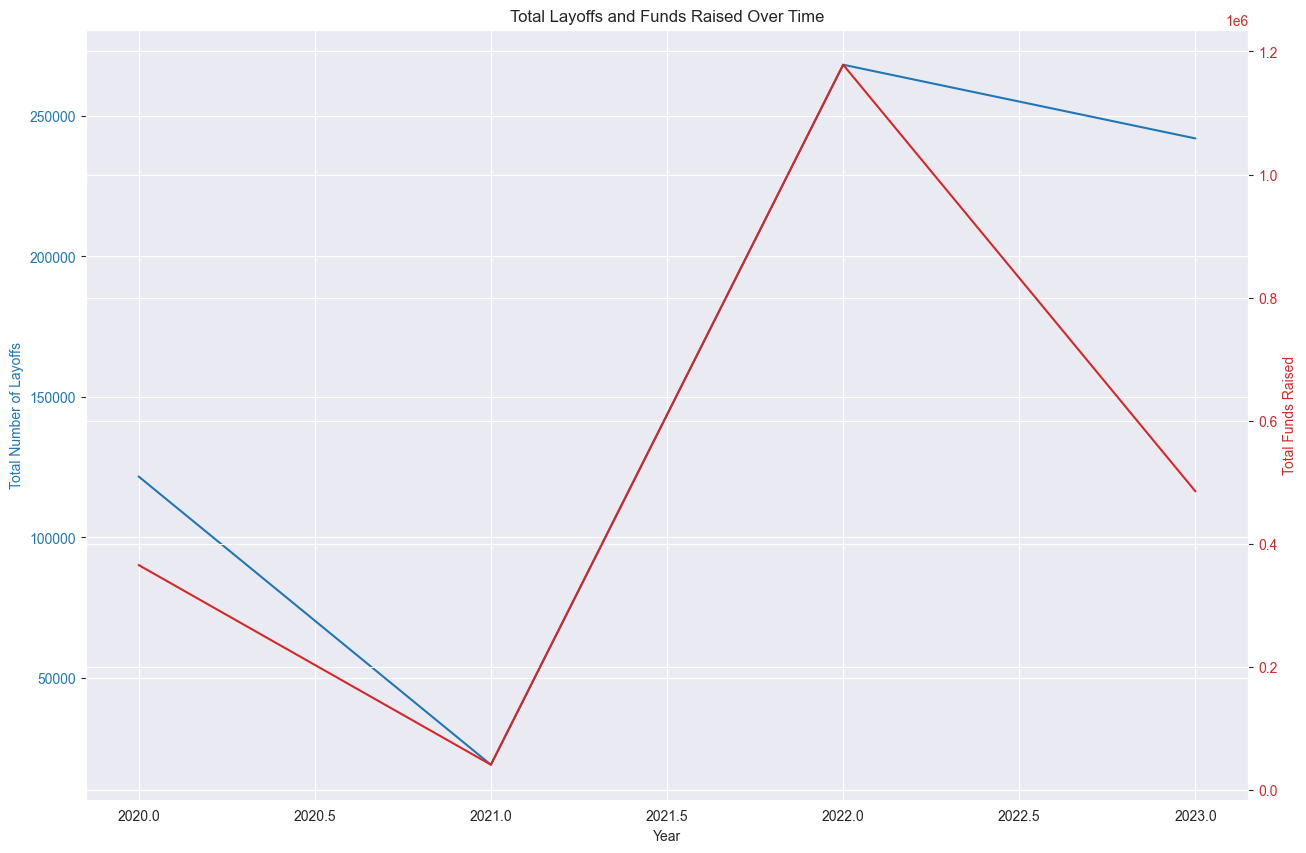

In [20]:
layoffs_df['date'] = pd.to_datetime(layoffs_df['date'])
# Group by year and compute total layoffs and funds raised per year
yearly_data = layoffs_df.resample('Y', on='date').agg({'total_laid_off': 'sum', 'funds_raised': 'sum'})
# Create a wider figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(15, 10))

# Create the first line plot for total layoffs
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Number of Layoffs', color=color)
ax1.plot(yearly_data.index.year, yearly_data['total_laid_off'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
# Create a second y-axis for the total funds raised
ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Total Funds Raised', color=color)
ax2.plot(yearly_data.index.year, yearly_data['funds_raised'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Total Layoffs and Funds Raised Over Time')
plt.show()

# LayOffs Distribution Over Stages

stage
Post-IPO          580.403564
Series J          478.252792
Series I          407.857143
Series H          321.849590
Series G          314.739290
Private Equity    277.888398
Acquired          262.678782
Subsidiary        218.800000
Series F          208.990687
Unknown           195.192280
Series E          166.020748
Series B          159.007331
Seed              151.574391
Series C          150.757399
Series D          148.356059
Series A          133.586734
Name: total_laid_off, dtype: float64


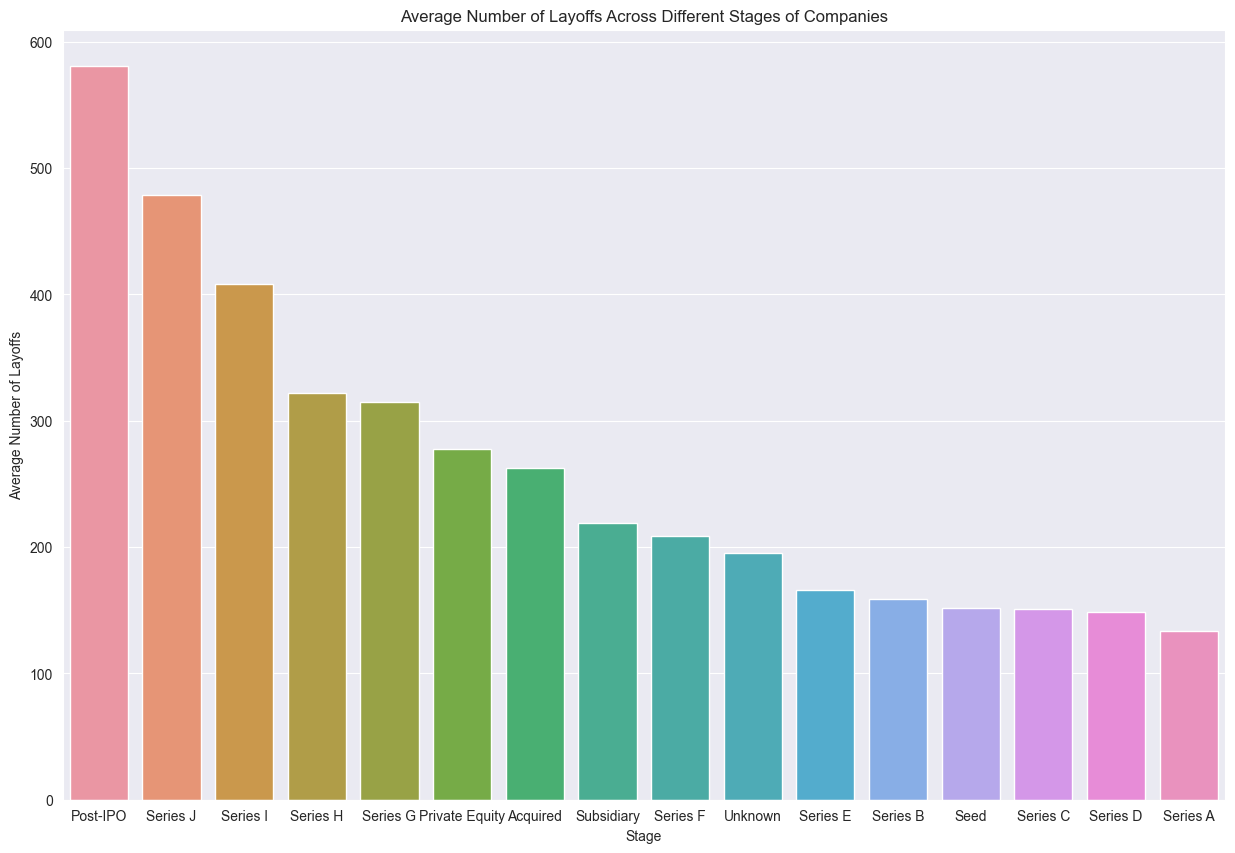

In [21]:
mean_layoffs_per_stage = layoffs_df.groupby('stage')['total_laid_off'].mean()
mean_layoffs_per_stage = mean_layoffs_per_stage.sort_values(ascending=False)
print(mean_layoffs_per_stage)

plt.figure(figsize=(15, 10))
sns.barplot(x=mean_layoffs_per_stage.index, y=mean_layoffs_per_stage.values)
plt.xlabel('Stage')
plt.ylabel('Average Number of Layoffs')
plt.title('Average Number of Layoffs Across Different Stages of Companies')
plt.show()

# Top 10 Countries with Highest Lay-Offs

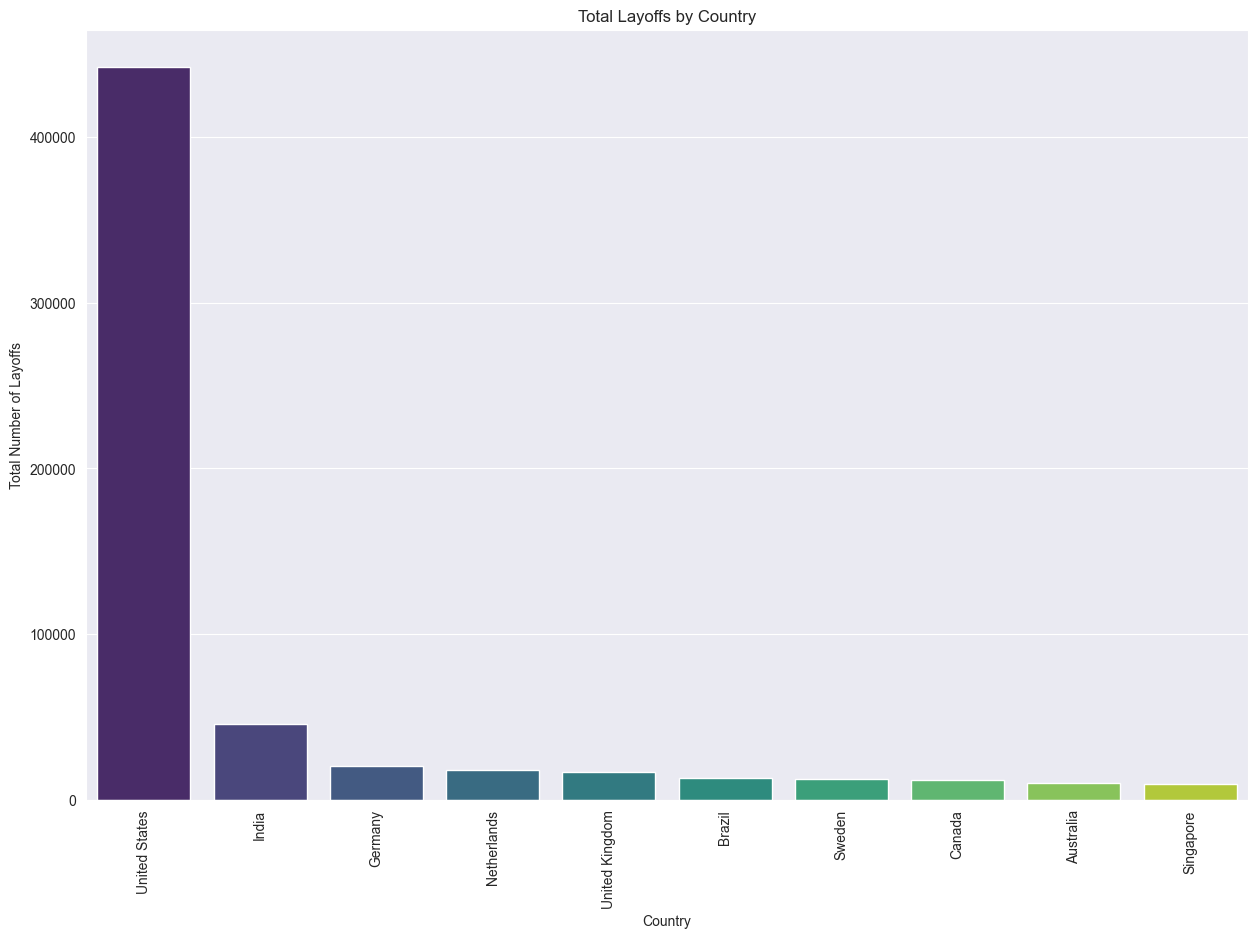

In [22]:
# Group by country and sum total_laid_off
grouped_layoffs = layoffs_df.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 10))
sns.barplot(x=grouped_layoffs.index, y=grouped_layoffs.values, palette='viridis')
plt.xticks(rotation=90) # Rotate the country labels for better visibility if they are long
plt.xlabel('Country')
plt.ylabel('Total Number of Layoffs')
plt.title('Total Layoffs by Country')
plt.show()

# Top 15 Companies wise Lay-Offs

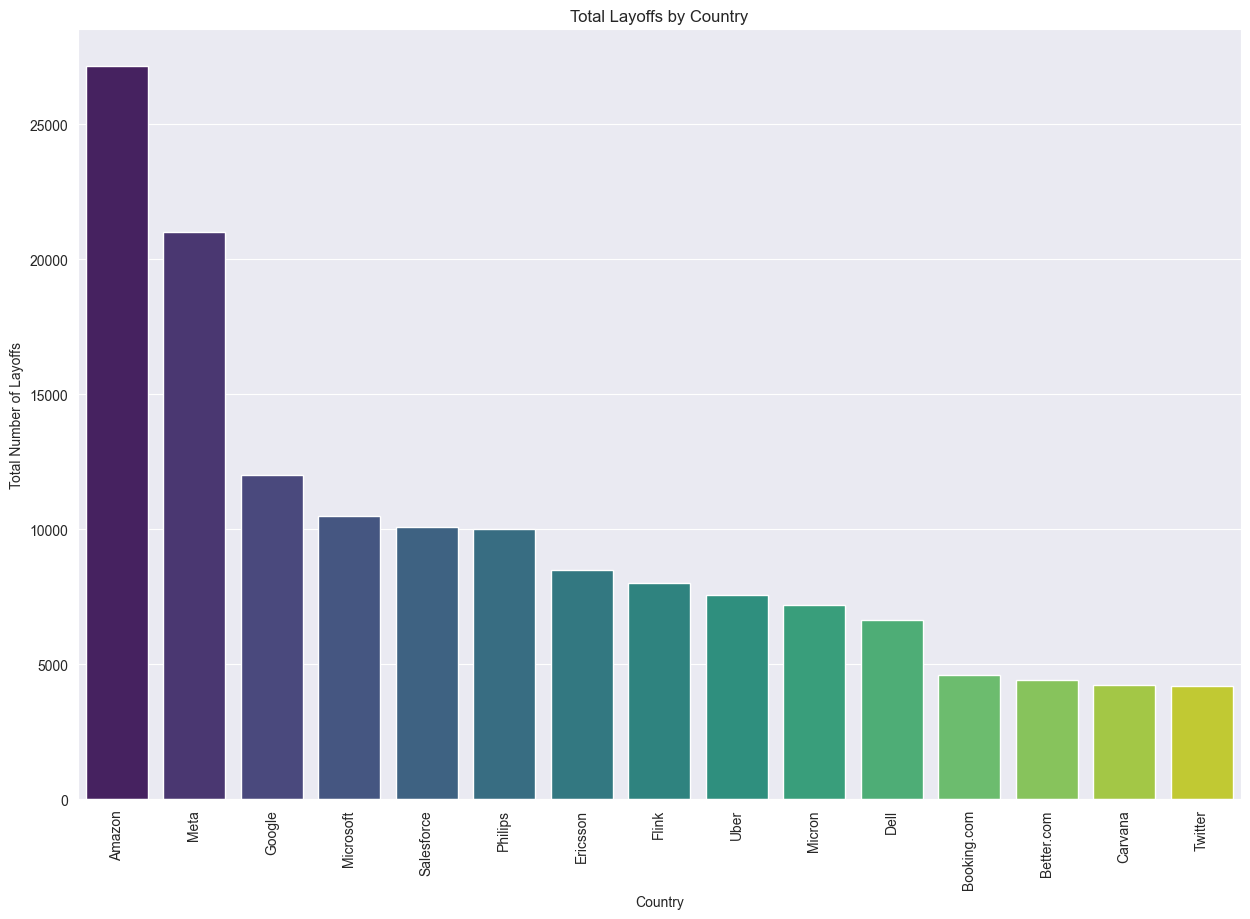

In [23]:
# Group by company and sum total_laid_off
grouped_layoffs = layoffs_df.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(15, 10))
sns.barplot(x=grouped_layoffs.index, y=grouped_layoffs.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total Number of Layoffs')
plt.title('Total Layoffs by Country')
plt.show()

# Box Plotting the lay-offs across different stages

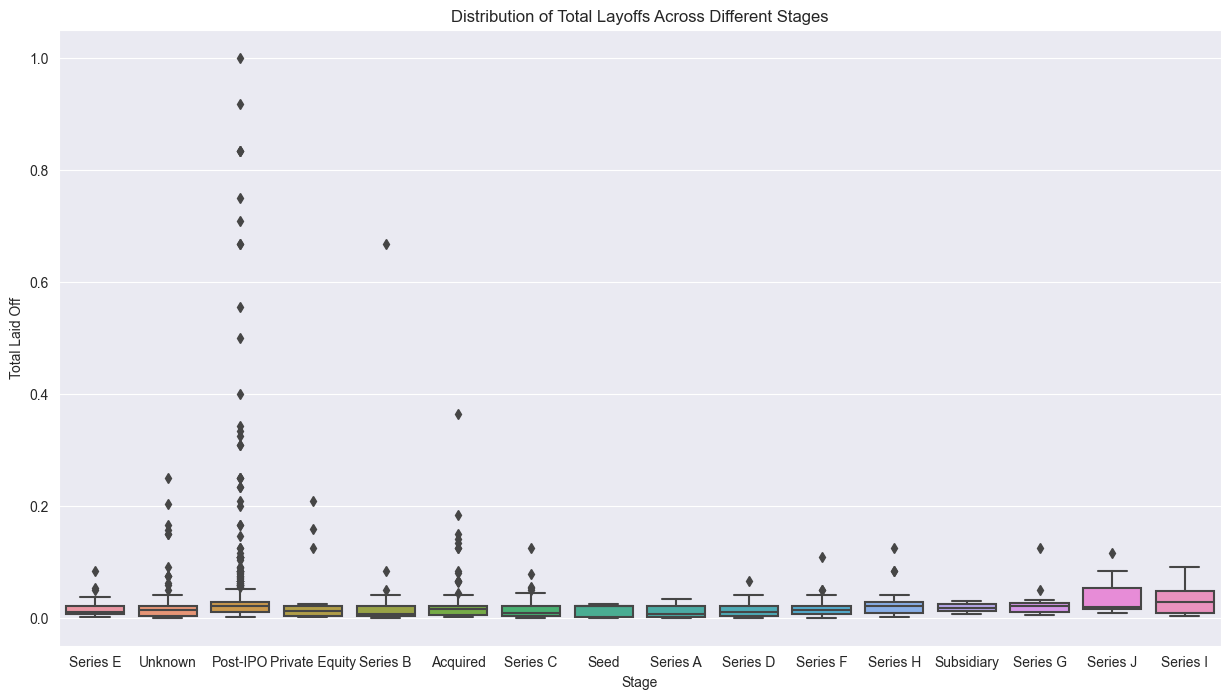

In [46]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='stage', y='total_laid_off', data=layoffs_df)
plt.title('Distribution of Total Layoffs Across Different Stages')
plt.xlabel('Stage')
plt.ylabel('Total Laid Off')
plt.show()

# LayOffs Over time: Month/Year Format

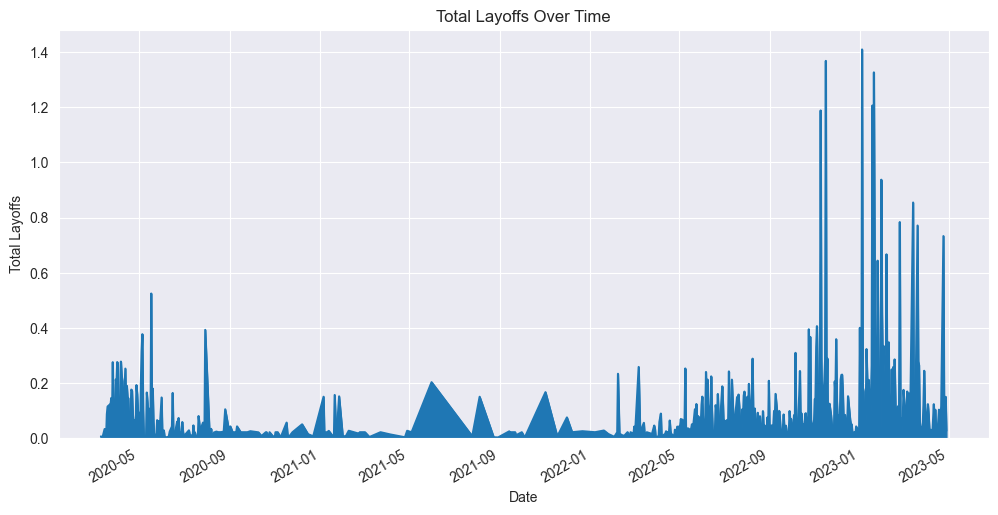

In [43]:
layoffs_df['date'] = pd.to_datetime(layoffs_df['date'])
grouped = layoffs_df.groupby('date')['total_laid_off'].sum()

fig, ax = plt.subplots(figsize=(12,6))
grouped.plot(kind='area', ax=ax)
plt.title('Total Layoffs Over Time')
plt.xlabel('Date')
plt.ylabel('Total Layoffs')
plt.show()

# Lay-Offs Map

In [34]:
import plotly.express as px

# aggregate data by country
country_layoffs = layoffs_df.groupby('country')['total_laid_off'].sum().reset_index()
fig = px.choropleth(country_layoffs,
                    locations="country",
                    color="total_laid_off",
                    locationmode = 'country names',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Total Layoffs by Country')
fig.show()